# **Gross National Income(per capita) vs Social Indicators**

### **A Regression Analysis**

This study aims to explore the relationship between an aggregate measure of the economy and social well-being. Gross Domestic Product (GDP), often used as an indicator of economic welfare, has significant limitations as it does not capture many factors contributing to a country's overall well-being.

### **Key Limitations of GDP as a Welfare Indicator**:
1. **Environmental Impact**: GDP does not account for environmental damage, such as pollution or loss of biodiversity, as these externalities are not monetized.
2. **Non-Market Transactions**: It excludes non-market activities like caregiving and domestic work.
3. **Inequality**: GDP overlooks how income or wealth is distributed among residents of a country.
4. **Long-Term Impact**: Actions depleting natural resources or impacting sustainability are ignored.
5. **Leisure Time**: GDP fails to reflect changes in leisure and quality of life.
6. **Health and Education**: It does not measure the quality of health and education.
7. **Sustainability**: GDP does not indicate whether a country's growth is sustainable in the long run.

### **Objective of the Study**
Using data provided by the World Bank, this analysis focuses on **Gross National Income (GNI) per capita** as the target variable. The study includes various social indices, such as the **Human Development Index (HDI)** and **Gender Development Index (GDI)**, to test the hypothesis that GDP or aggregate economic measures are insufficient indicators of well-being. 

If the hypothesis is rejected, we expect to observe a positive relationship between **GNI per capita** and social indicators.

In [1]:
import pandas as pd
import numpy as np
!pip install openpyxl

In [2]:
df = pd.read_excel('hdr.xlsx',index_col = 'Row Labels')
df.tail()
df.drop(['(blank)','Grand Total'],inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Carbon dioxide emissions per capita (production) (tonnes)      193 non-null    float64
 1   Coefficient of human inequality                                165 non-null    float64
 2   Expected Years of Schooling (years)                            194 non-null    float64
 3   Expected Years of Schooling, female (years)                    194 non-null    float64
 4   Expected Years of Schooling, male (years)                      194 non-null    float64
 5   GDI Group                                                      182 non-null    float64
 6   Gender Development Index (value)                               182 non-null    float64
 7   Gender Inequality Index (value)                     

## **Information of Dataset**

In [4]:
df1 = df.copy()
df1.drop(['Material footprint per capita (tonnes)','Inequality in income','Inequality in eduation','HDI female','HDI male','Gender Inequality Index (value)','Coefficient of human inequality','Expected Years of Schooling, female (years)','Expected Years of Schooling, male (years)','GDI Group','Inequality in life expectancy','Maternal Mortality Ratio (deaths per 100,000 live births)','Share of seats in parliament, male (% held by men)'],axis=1,inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 10 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Carbon dioxide emissions per capita (production) (tonnes)      193 non-null    float64
 1   Expected Years of Schooling (years)                            194 non-null    float64
 2   Gender Development Index (value)                               182 non-null    float64
 3   Gross National Income Per Capita (2017 PPP$)                   193 non-null    float64
 4   Human Development Index (value)                                193 non-null    float64
 5   Labour force participation rate, female (% ages 15 and older)  183 non-null    float64
 6   Labour force participation rate, male (% ages 15 and older)    183 non-null    float64
 7   Life Expectancy at Birth (years)                    

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer

In [6]:
Knnimputer = KNNImputer(n_neighbors = 14, weights = "uniform")
imputed_data = Knnimputer.fit_transform(df1)
df_imputed = pd.DataFrame(imputed_data, index = df.index, columns=df1.columns)
df_imputed.head()

,Carbon dioxide emissions per capita (production) (tonnes),Expected Years of Schooling (years),Gender Development Index (value),Gross National Income Per Capita (2017 PPP$),Human Development Index (value),"Labour force participation rate, female (% ages 15 and older)","Labour force participation rate, male (% ages 15 and older)",Life Expectancy at Birth (years),Mean Years of Schooling (years),"Share of seats in parliament, female (% held by women)"
Row Labels,,,,,,,,,,
Afghanistan,0.306,10.705,0.622000,1335.206,0.462,23.330000,77.090000,62.879,2.515,27.215
Albania,1.718,14.487,0.977000,15293.327,0.789,56.080000,69.910000,76.833,10.121,35.714
Algeria,4.080,15.488,0.881000,10978.406,0.745,17.570000,65.530000,77.129,6.987,7.005
Andorra,4.594,12.784,0.972429,54233.449,0.884,54.855714,71.560714,83.552,11.613,46.429
Angola,0.507,12.168,0.905000,5327.788,0.591,74.730000,78.160000,61.929,5.844,33.636


In [7]:
imputed_data

array([[ 0.306, 10.705,  0.622, ..., 62.879,  2.515, 27.215],
       [ 1.718, 14.487,  0.977, ..., 76.833, 10.121, 35.714],
       [ 4.08 , 15.488,  0.881, ..., 77.129,  6.987,  7.005],
       ...,
       [ 0.351,  7.935,  0.456, ..., 63.72 ,  2.777,  0.294],
       [ 0.445, 11.018,  0.93 , ..., 61.803,  7.285, 15.06 ],
       [ 0.525, 11.026,  0.936, ..., 59.391,  8.808, 33.626]])

## __*Preliminary Descriptive Analysis*__

In [8]:
df_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
Carbon dioxide emissions per capita (production) (tonnes),195.0,4.373053,5.546605,0.038,0.792500,2.5390,5.8505,39.884
Expected Years of Schooling (years),195.0,13.561890,3.035598,5.635,11.673000,13.3810,15.6765,21.080
Gender Development Index (value),195.0,0.948418,0.070363,0.456,0.926000,0.9700,0.9910,1.064
Gross National Income Per Capita (2017 PPP$),195.0,21087.447118,22439.108954,690.661,4794.453000,12467.8550,32353.0670,146673.242
Human Development Index (value),195.0,0.724526,0.154716,0.380,0.605000,0.7400,0.8480,0.967
"Labour force participation rate, female (% ages 15 and older)",195.0,49.824304,14.692105,5.840,42.693571,52.1100,59.0800,82.940
"Labour force participation rate, male (% ages 15 and older)",195.0,69.915473,9.982856,29.630,65.380000,69.9300,75.8500,98.580
Life Expectancy at Birth (years),195.0,71.928241,7.897440,52.997,65.935500,72.3000,77.9525,86.895
Mean Years of Schooling (years),195.0,9.028552,3.210252,1.341,6.527500,9.4240,11.6350,14.256
"Share of seats in parliament, female (% held by women)",195.0,25.266372,12.173021,0.294,16.850500,25.1725,33.3330,54.717


In [9]:
iqr = 32353.0670 - 4794.453000

In [10]:
df_imputed.rename(columns={'Carbon dioxide emissions per capita (production) (tonnes)':'cdepc',
       'Expected Years of Schooling (years)':'eys',
       'Expected Years of Schooling, female (years)':'eysf',
       'Expected Years of Schooling, male (years)':'eysm', 'GDI Group':'gdig',
       'Gender Development Index (value)':'gdi',
       'Gross National Income Per Capita (2017 PPP$)':'gnip',
       'Human Development Index (value)':'hdi', 'Inequality in life expectancy':'ile',
       'Labour force participation rate, female (% ages 15 and older)':'lfprf',
       'Labour force participation rate, male (% ages 15 and older)':'lfprm',
       'Life Expectancy at Birth (years)':'leb',
       'Maternal Mortality Ratio (deaths per 100,000 live births)':'mmr',
       'Mean Years of Schooling (years)':'mys',
       'Share of seats in parliament, female (% held by women)':'sspf',
       'Share of seats in parliament, male (% held by men)':'sspm'},inplace=True)
columns = df_imputed.columns
df_imputed

,cdepc,eys,gdi,gnip,hdi,lfprf,lfprm,leb,mys,sspf
Row Labels,,,,,,,,,,
Afghanistan,0.306,10.705,0.622000,1335.206,0.462,23.330000,77.090000,62.879,2.515,27.215
Albania,1.718,14.487,0.977000,15293.327,0.789,56.080000,69.910000,76.833,10.121,35.714
Algeria,4.080,15.488,0.881000,10978.406,0.745,17.570000,65.530000,77.129,6.987,7.005
Andorra,4.594,12.784,0.972429,54233.449,0.884,54.855714,71.560714,83.552,11.613,46.429
Angola,0.507,12.168,0.905000,5327.788,0.591,74.730000,78.160000,61.929,5.844,33.636
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2.539,13.502,1.002000,6184.136,0.699,45.210000,70.570000,71.105,9.628,22.156
Viet Nam,3.617,13.053,1.007000,10813.983,0.726,68.540000,77.840000,74.580,8.455,30.261
Yemen,0.351,7.935,0.456000,1105.763,0.424,5.840000,64.690000,63.720,2.777,0.294


# __Data Visualization__

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import plotly.express as px

### __*correlation matrix heatmap*__

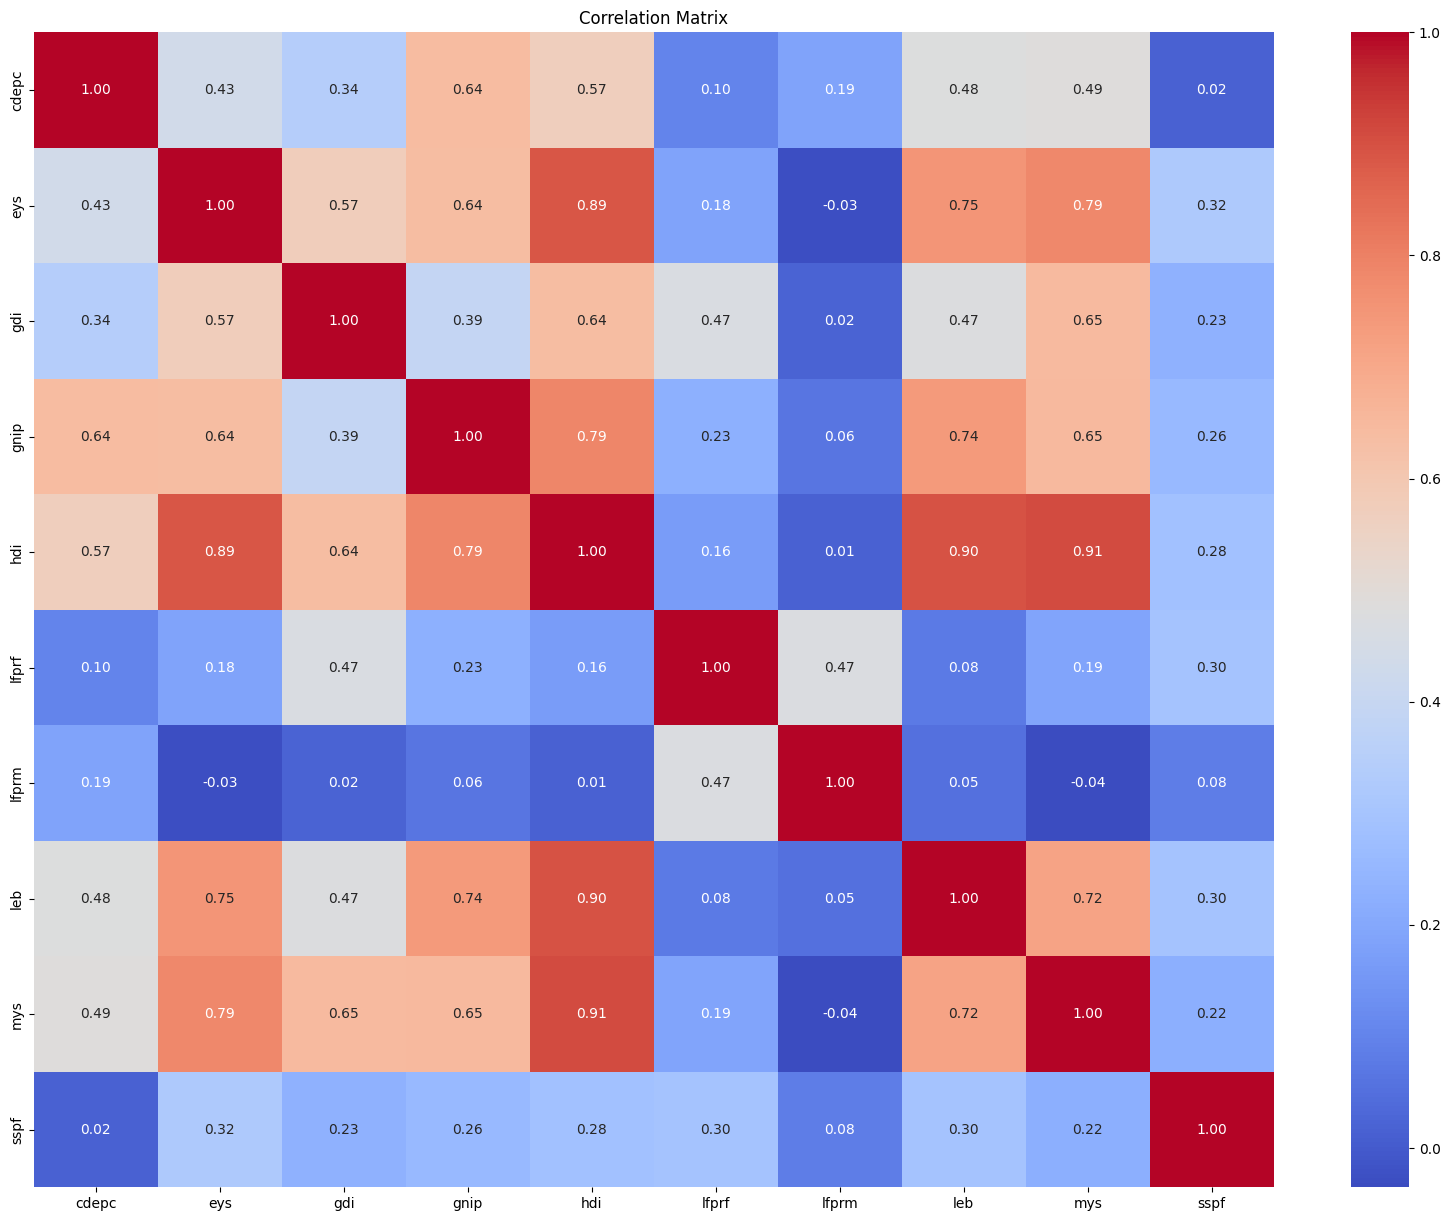

In [12]:
plt.figure(figsize=(20, 15))
corr_matrix = df_imputed.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<Figure size 2000x2000 with 0 Axes>

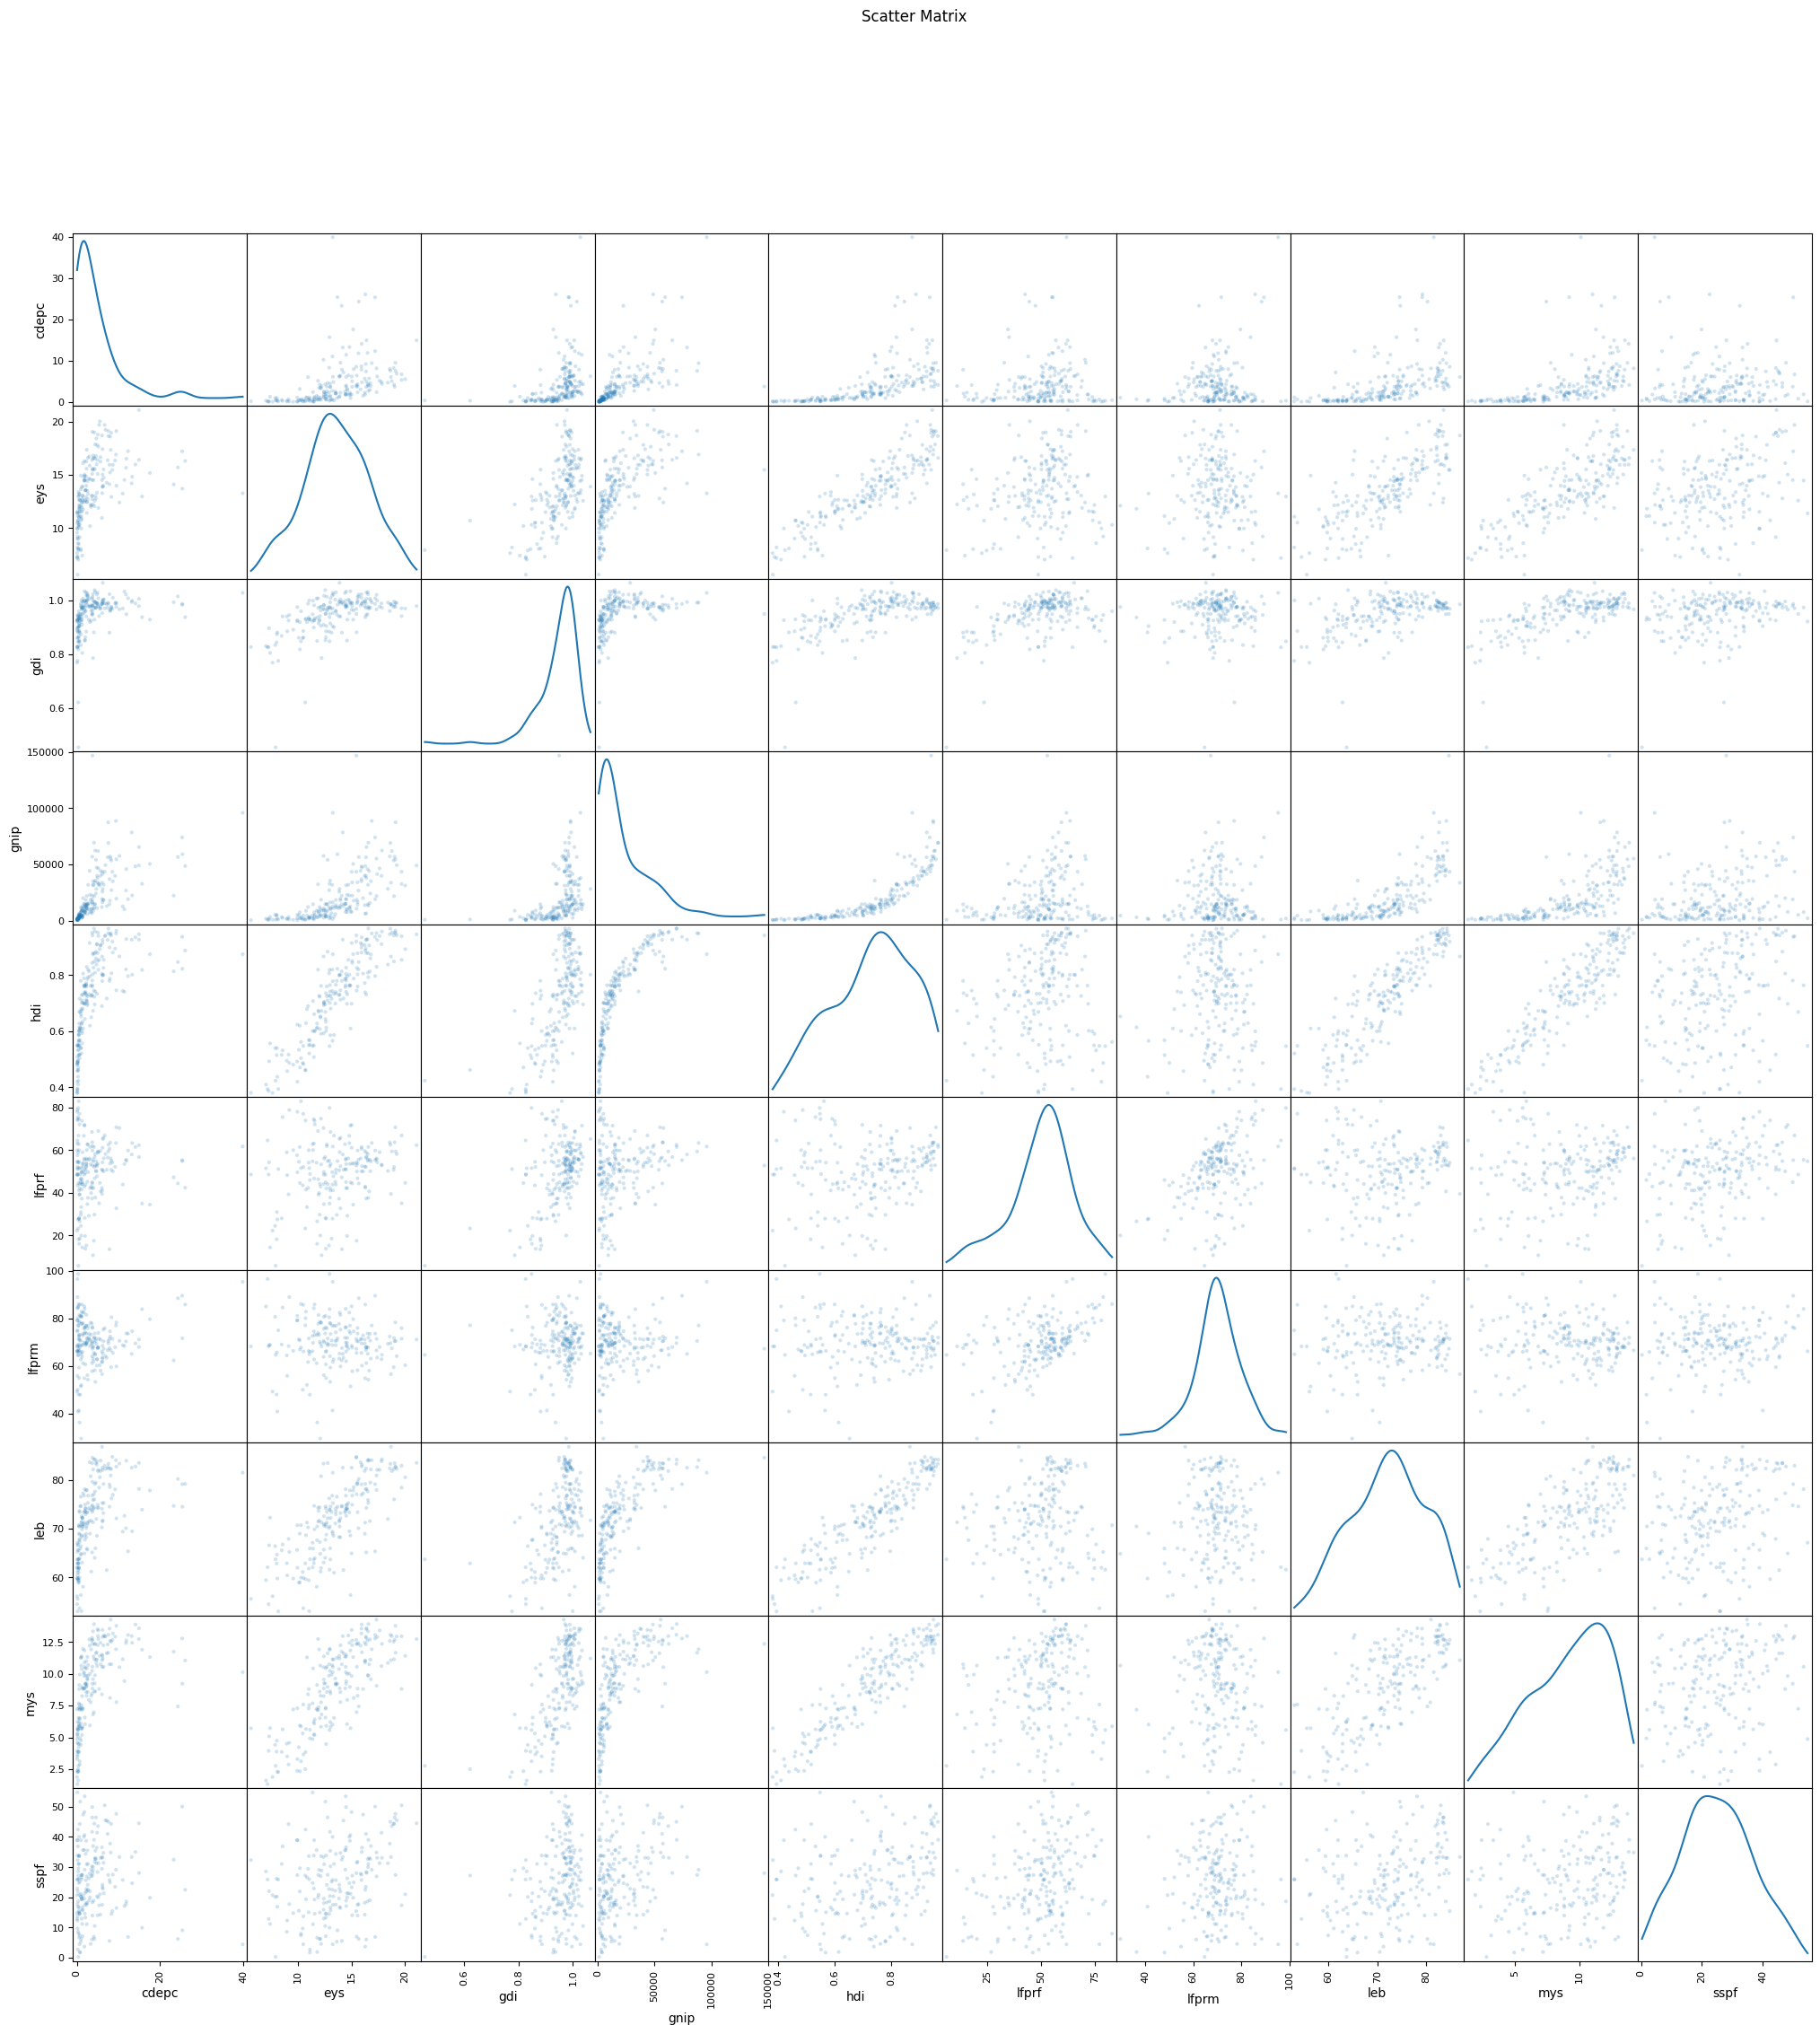

In [14]:
# Plot scatter matrix
plt.figure(figsize=(20, 20))
scatter_matrix(df_imputed, alpha=0.2, figsize=(25, 25), diagonal='kde')
plt.suptitle('Scatter Matrix')
plt.show()

### __*Residual Plots*__

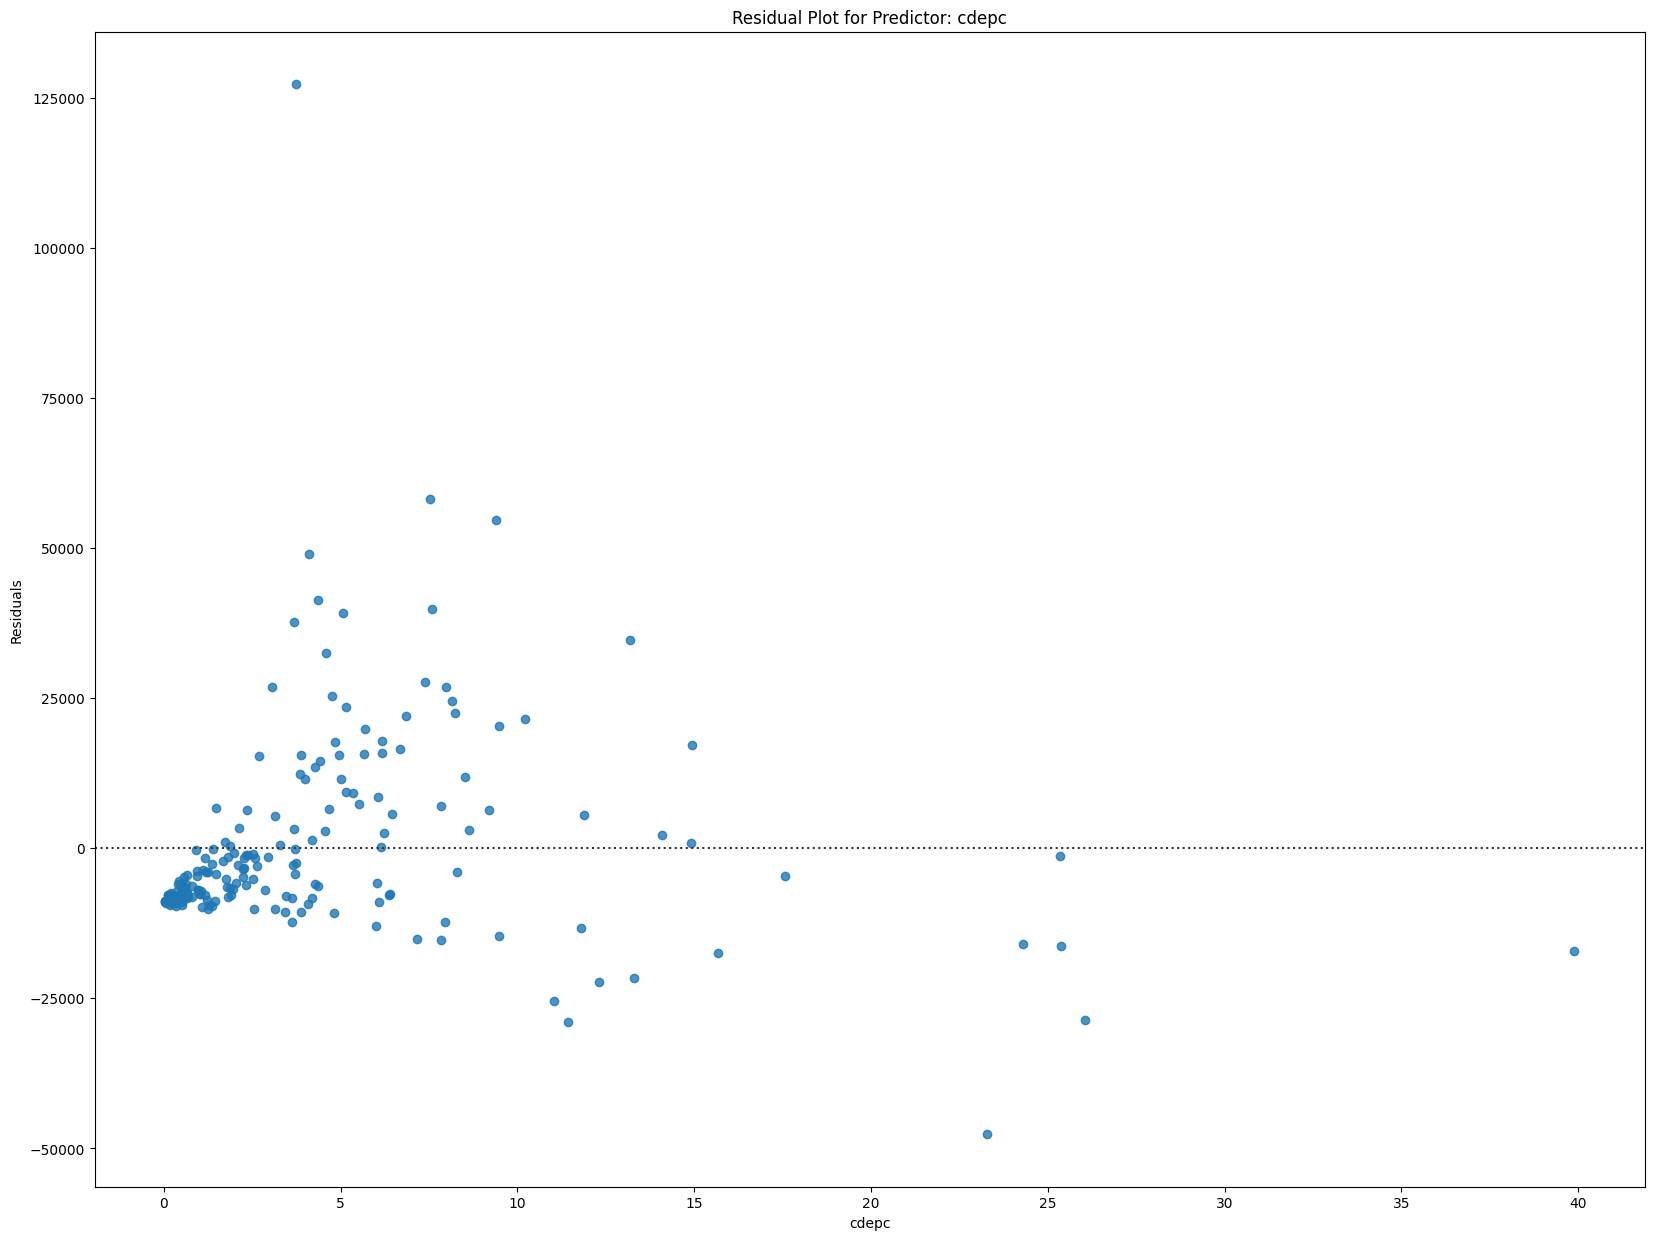

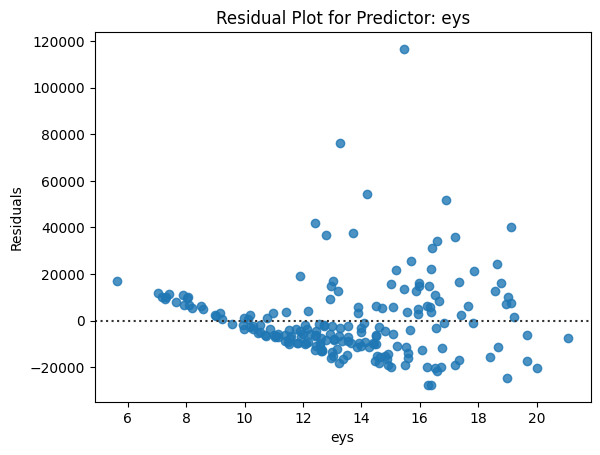

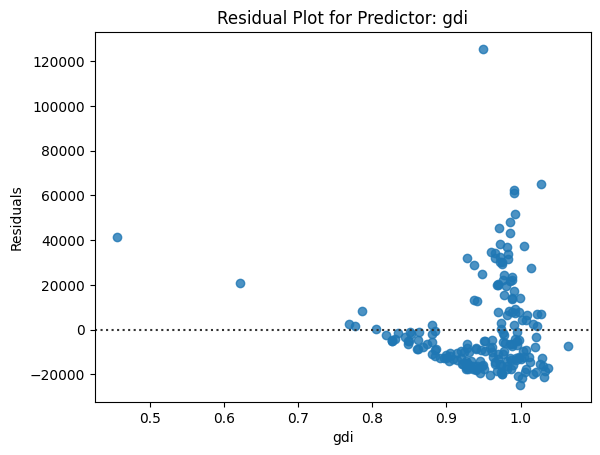

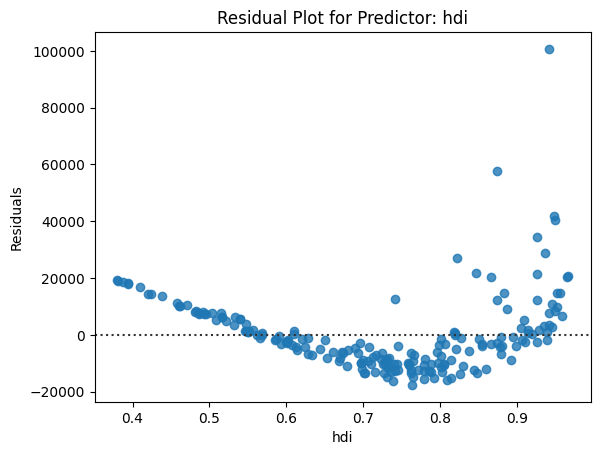

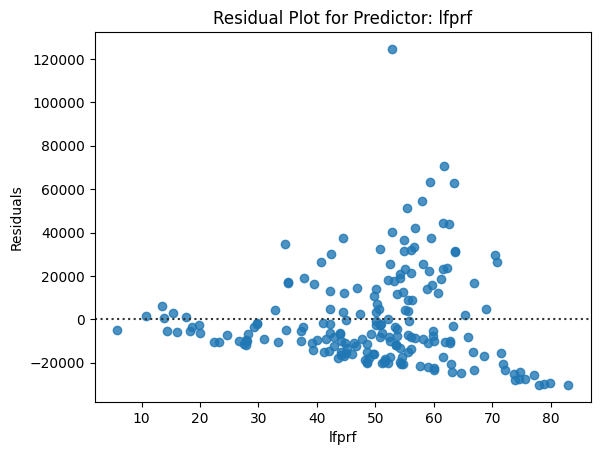

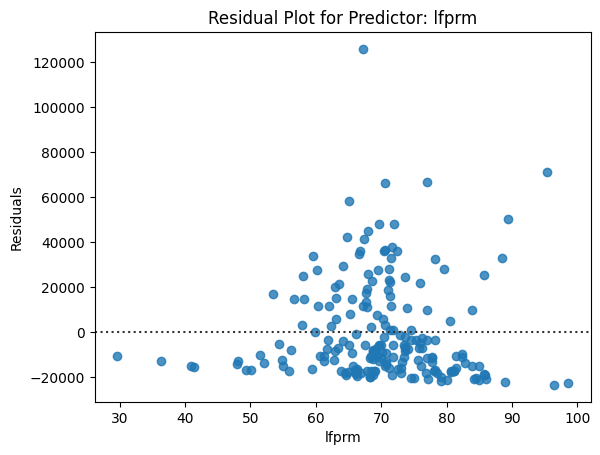

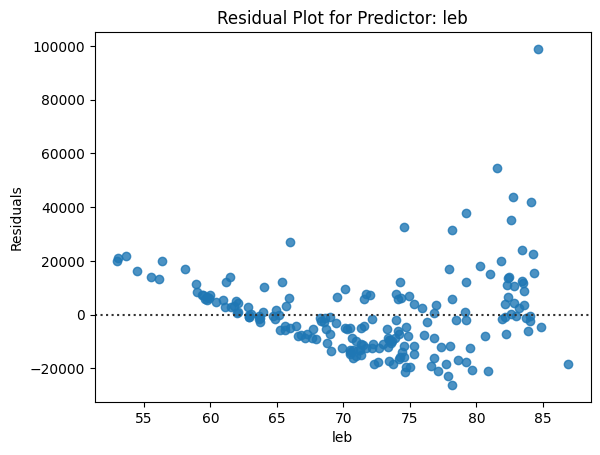

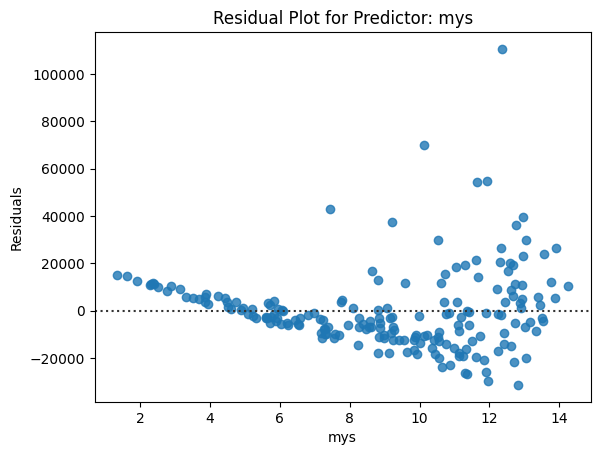

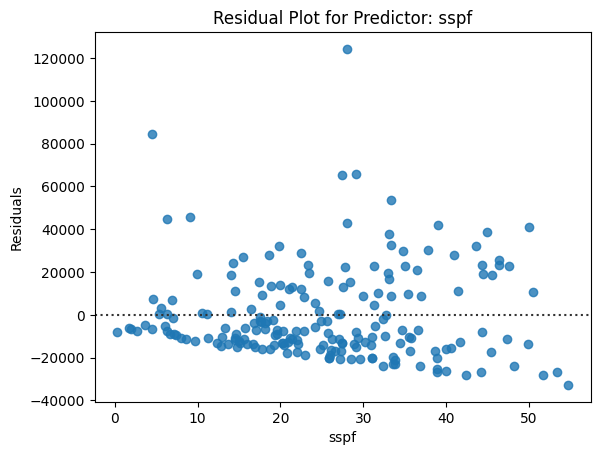

In [15]:
plt.figure(figsize=(20,15))
import seaborn as sns 
import matplotlib.pyplot as plt 
  

for b in df_imputed.columns:
    if b != 'gnip':
        sns.residplot(x=b, y="gnip", data=df_imputed)
        plt.title(f"Residual Plot for Predictor: {b}")
        plt.xlabel(b)
        plt.ylabel("Residuals")
        plt.show()

> Residual plots indicate heteroscedasticity

## __*Visualization to check Linearity*__

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
rig_model = ols("gnip ~ cdepc + eys + gdi + hdi+ lfprf + lfprm + leb + mys +sspf", data = df_imputed).fit()
rig_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gnip   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     77.21
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           7.12e-58
Time:                        10:39:07   Log-Likelihood:                -2077.8
No. Observations:                 195   AIC:                             4176.
Df Residuals:                     185   BIC:                             4208.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.004e+04   1.87e+04      2.680      0.008    1.32e+04    8.69e+04
cdepc        998.4985    182.268      5.478      0.000     638.908    1358.089
eys        -2989.4876    610.315     -4.898      0.000   -4193.560   -1785.416
gdi        -1.162e+05   1.72e+04     -6.773      0.000    -1.5e+05   -8.24e+04
hdi         2.591e+05   3.19e+04      8.125      0.000    1.96e+05    3.22e+05
lfprf        511.7597     74.306      6.887      0.000     365.164     658.355
lfprm       -409.5875     94.388     -4.339      0.000    -595.802    -223.373
leb         -533.0426    288.638     -1.847      0.066   -1102.487      36.402
mys        -3389.0902    715.865     -4.734      0.000   -4801.398   -1976.782
sspf          70.2804     70.021      1.004      0.317     -67.862     208.423
==============================================================================
Omnibus:                      203.439   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8111.555
Skew:                           3.873   Prob(JB):                         0.00
Kurtosis:                      33.632   Cond. No.                     5.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### __*Partial Regression Plot*__

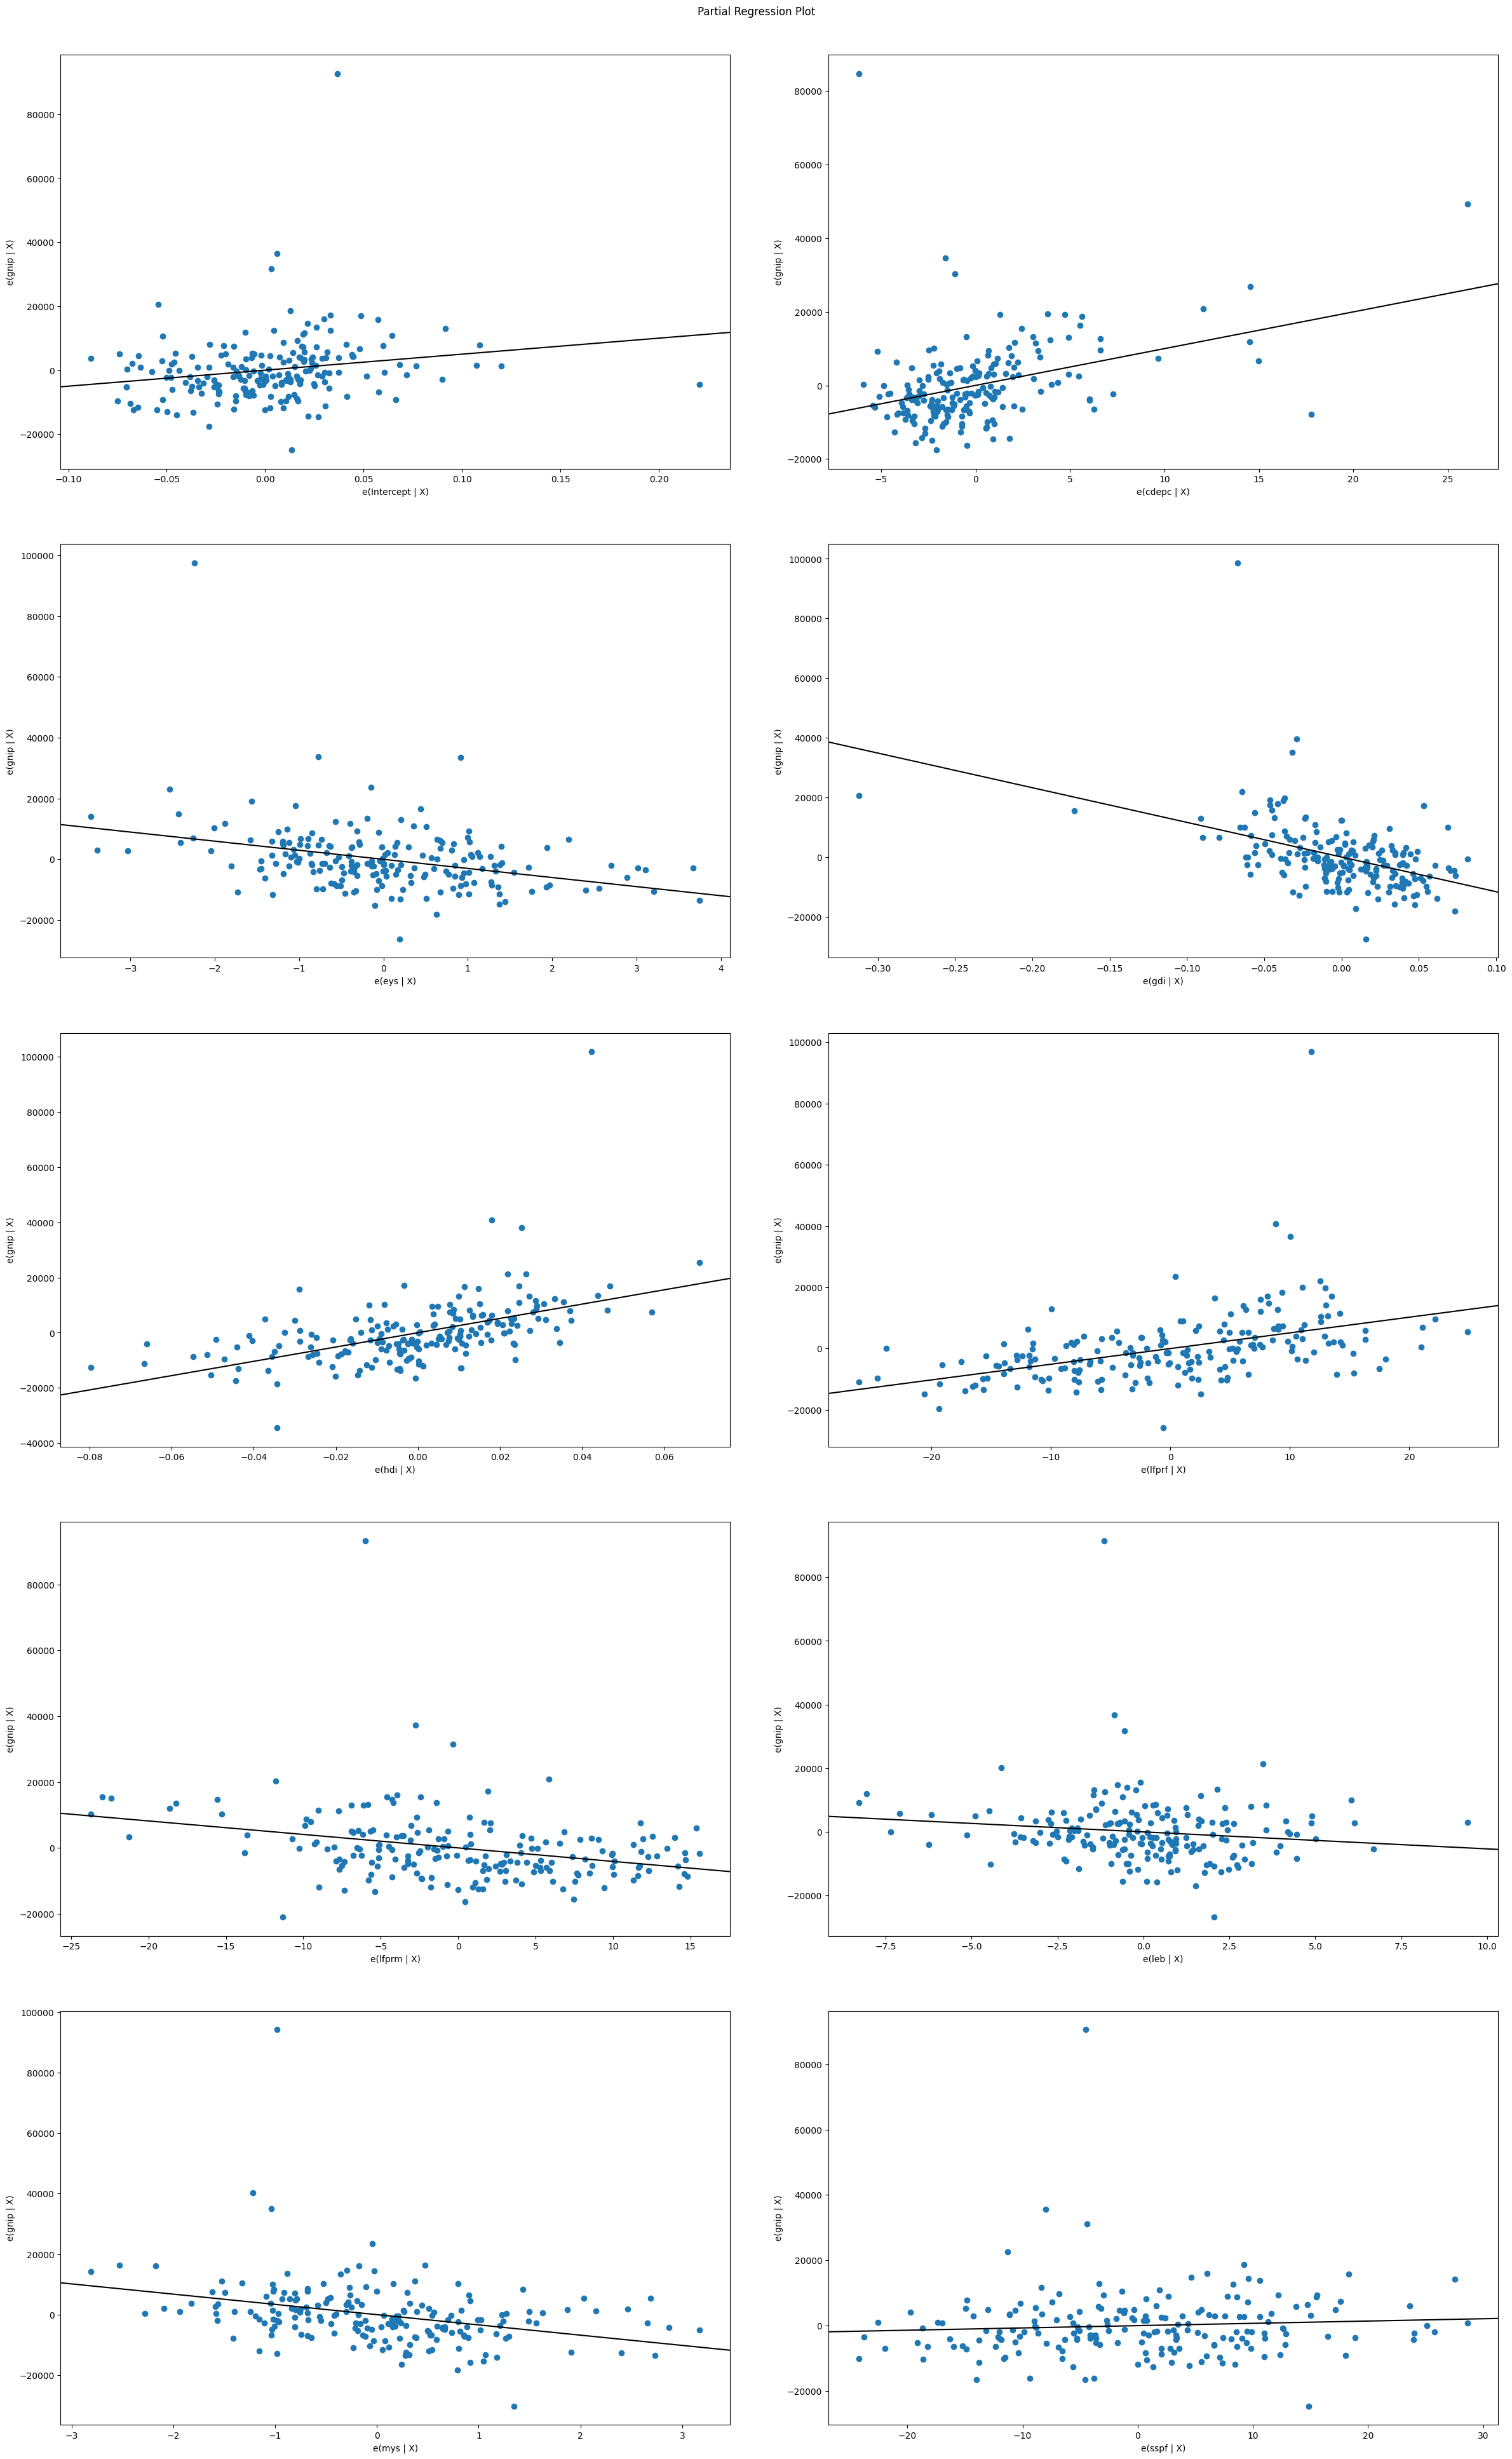

In [17]:
fig = sm.graphics.plot_partregress_grid(rig_model)
fig.set_size_inches(25, 40)
fig.tight_layout(pad=5.0)

> Partial Regression plot Indicates Linearity between features and target but to ensure linearity we also check CCPR plot

### __*CCPR PLOT*__

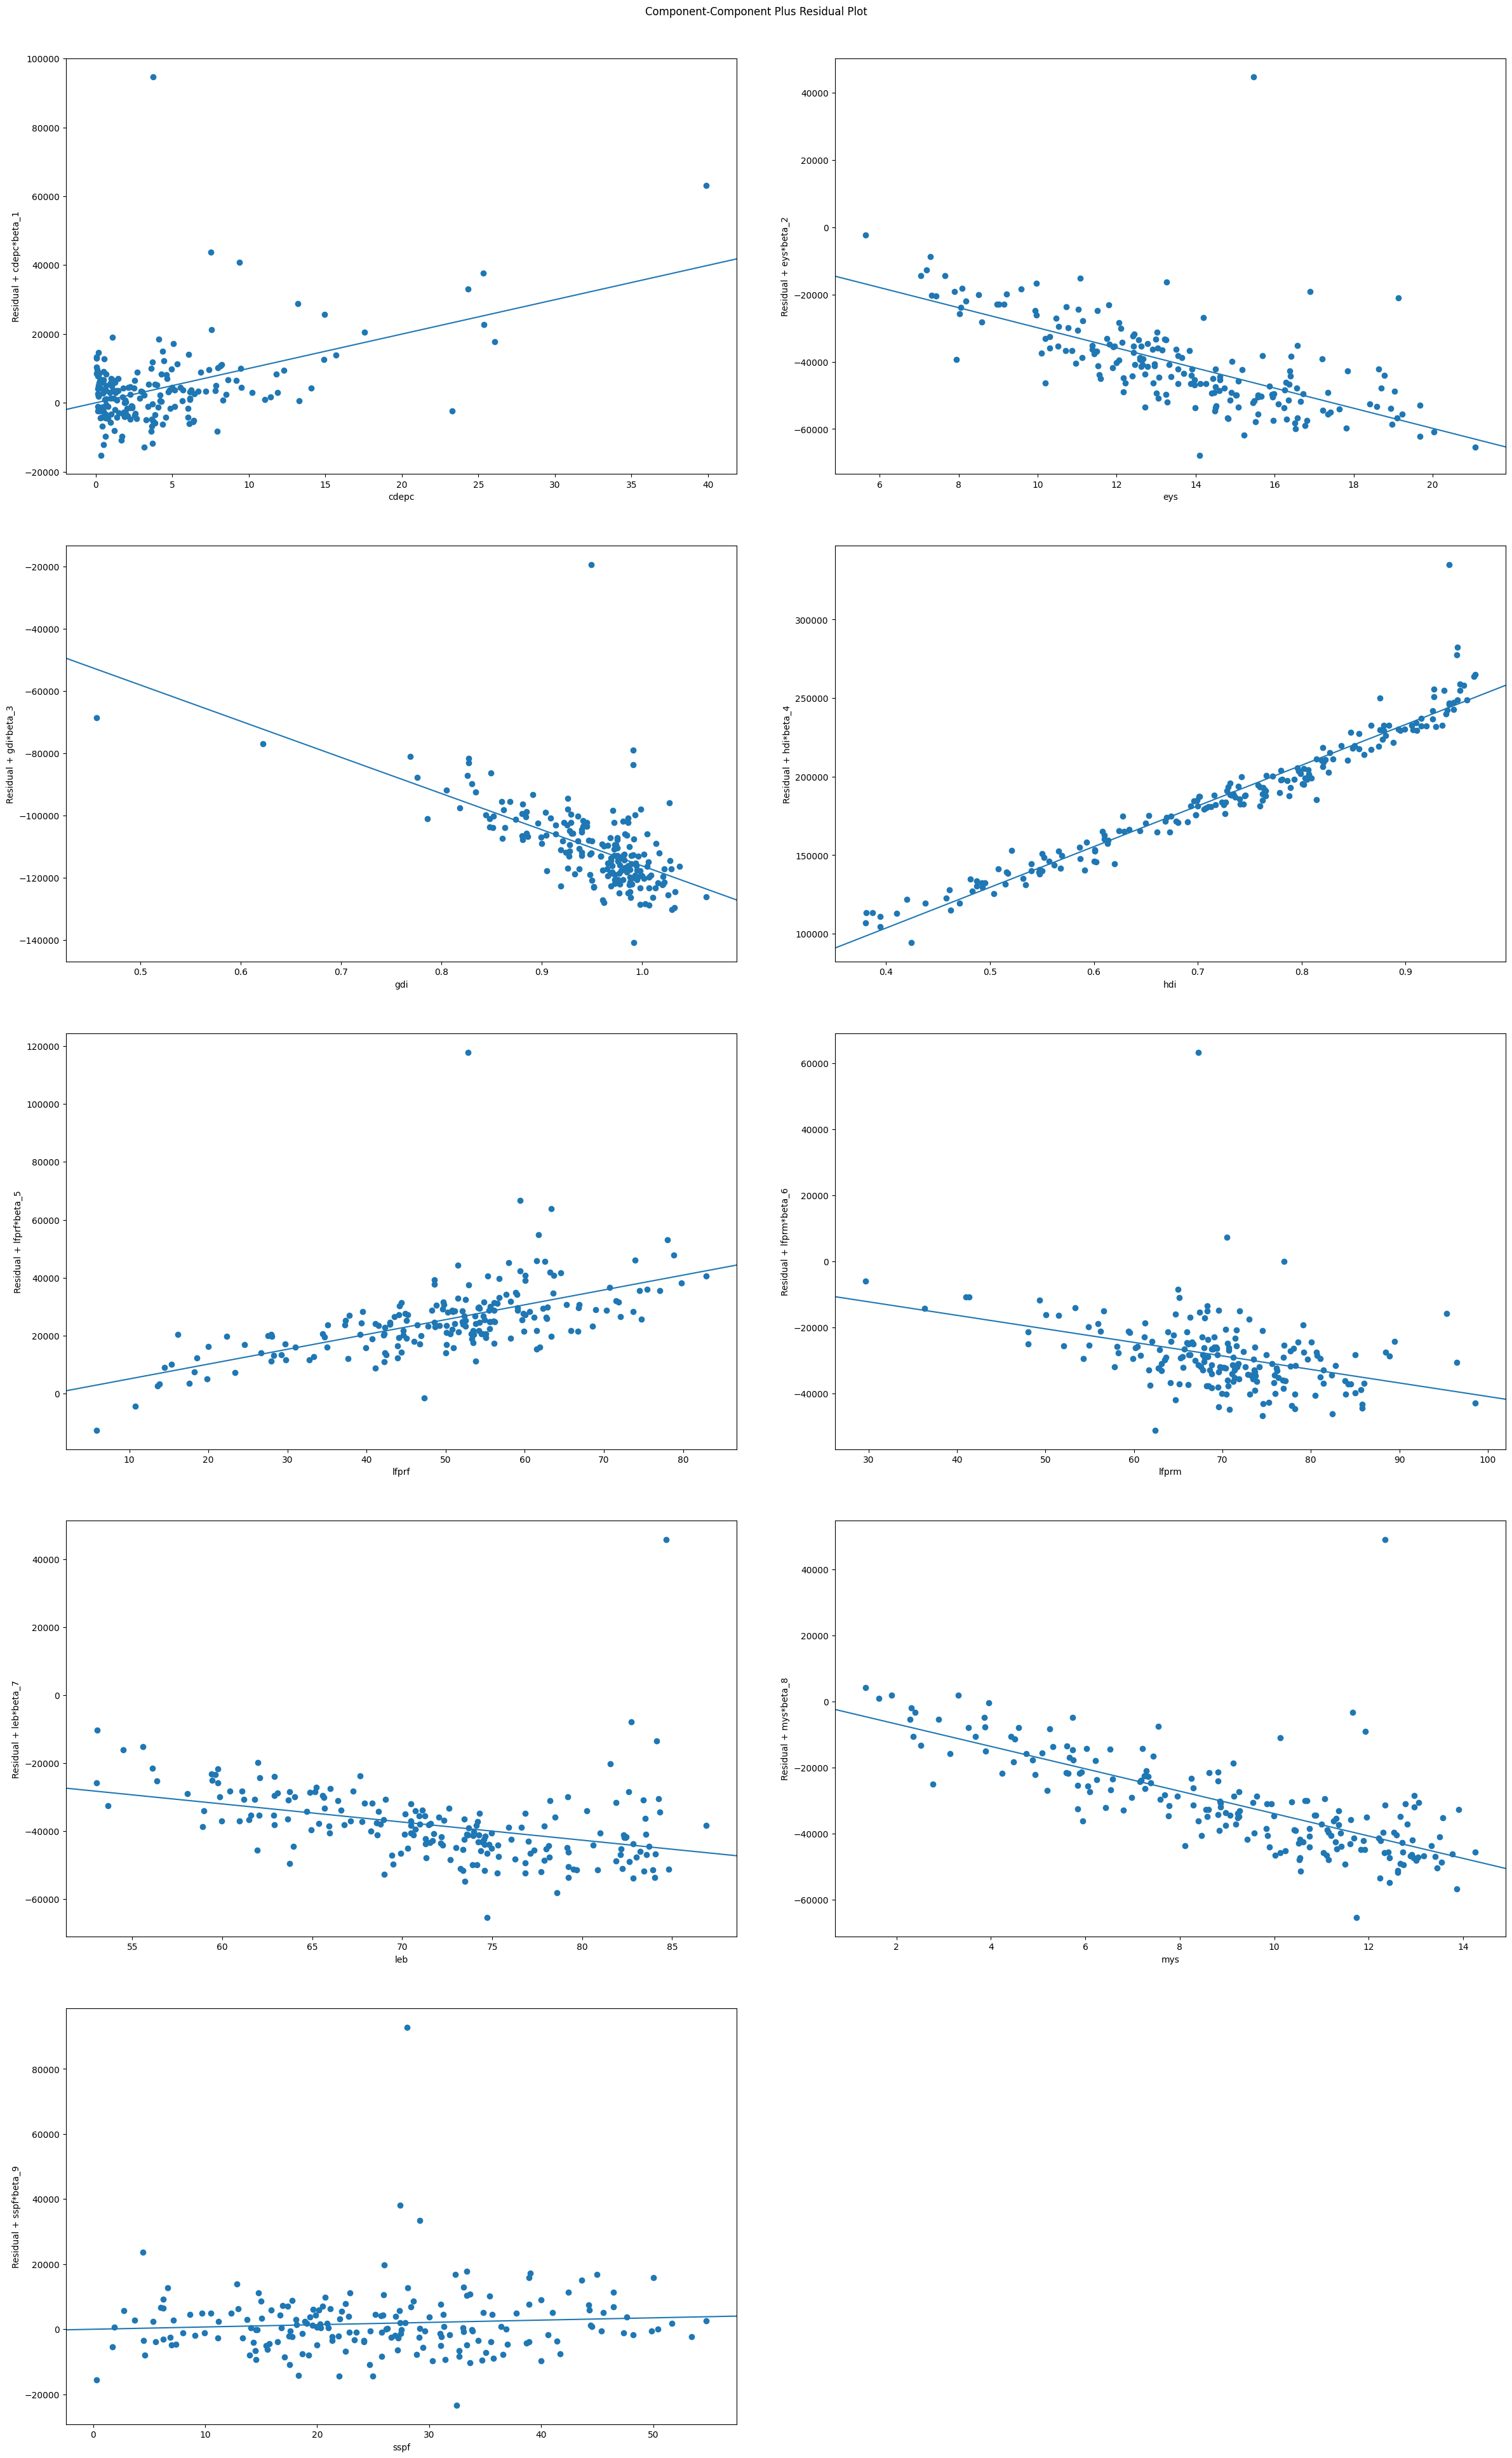

In [18]:
fig = sm.graphics.plot_ccpr_grid(rig_model)
fig.set_size_inches(25, 40)
fig.tight_layout(pad=5.0)

> Linearity is verified

## __*Data Visualization for Normality*__
### __*QQ-Plot*__

In [19]:
predictions = rig_model.predict()
residuals = df_imputed['gnip']-predictions
residuals

Afghanistan                          -0.479691
Albania                              -1.088502
Algeria                              -0.524319
Andorra                               0.357092
Angola                               -1.229004
                                        ...   
Venezuela (Bolivarian Republic of)    0.387141
Viet Nam                             -1.136248
Yemen                                -1.832292
Zambia                                0.218033
Zimbabwe                              0.825538
Name: student_resid, Length: 195, dtype: float64

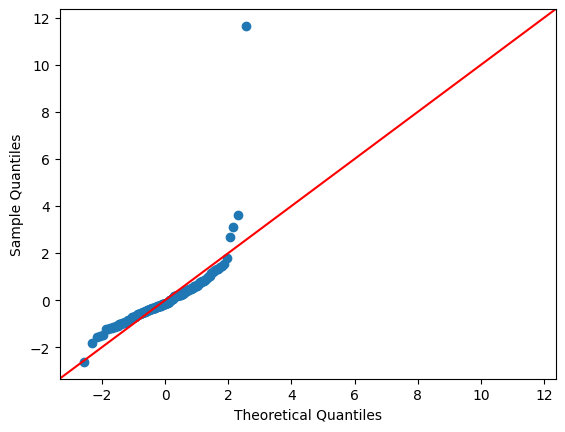

In [20]:
sm.qqplot(residuals,line = '45')
plt.show()

> The Q-Q plot  suggests that our response variable is heavily skewed or contains extreme outliers. This is why the data points deviate significantly from the 45-degree line, especially for larger values.
> This implies data might not be normal.
> Data contains extreme Outliers.
> Data is affected by very high numeric values.


### **Checking for outliers**

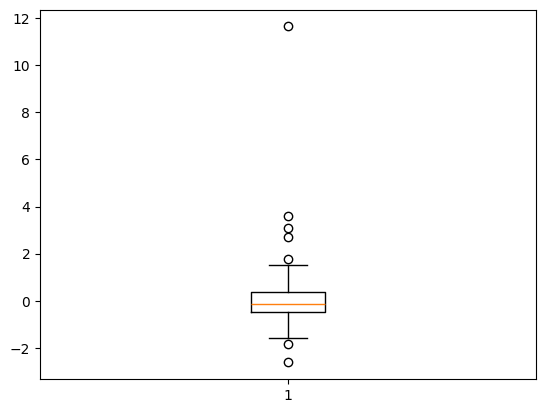

In [21]:
bp = plt.boxplot(residuals, notch=None, vert=None, patch_artist=None, widths=None) 
plt.show()

> box plot indicated extreme outliers

## __***Formal Tests***__
### __*Tests for Normality*__

### *Kolmogorov-Smirnov Test*

In [22]:
from scipy.stats import kstest
residuals = rig_model.resid
kstest(residuals, 'norm')

KstestResult(statistic=0.558974358974359, pvalue=6.423337210878045e-58, statistic_location=-113.60878398153909, statistic_sign=1)

### *Shapiro-Wilk Test*

In [23]:
from scipy.stats import shapiro
shapiro(residuals)

ShapiroResult(statistic=0.7497735023498535, pvalue=6.848733202372418e-17)

### **box-cox Transformation**

In [24]:
from scipy import stats 
fittedData, lambdaValue = stats.boxcox(df_imputed['gnip'])
lambdaValue

0.11397882066825003

In [25]:
df_imputed['transformed_gnip'] = fittedData
df_imputed1 = df_imputed.drop(['gnip'],axis=1)
df_imputed1.head()

,cdepc,eys,gdi,hdi,lfprf,lfprm,leb,mys,sspf,transformed_gnip
Row Labels,,,,,,,,,,
Afghanistan,0.306,10.705,0.622000,0.462,23.330000,77.090000,62.879,2.515,27.215,11.152533
Albania,1.718,14.487,0.977000,0.789,56.080000,69.910000,76.833,10.121,35.714,17.536416
Algeria,4.080,15.488,0.881000,0.745,17.570000,65.530000,77.129,6.987,7.005,16.560906
Andorra,4.594,12.784,0.972429,0.884,54.855714,71.560714,83.552,11.613,46.429,21.620033
Angola,0.507,12.168,0.905000,0.591,74.730000,78.160000,61.929,5.844,33.636,14.556898


In [26]:
rig_model1 = ols("transformed_gnip ~ cdepc + eys + gdi + hdi+ lfprf + lfprm + leb + mys +sspf", data = df_imputed1).fit()
residuals1 = rig_model1.resid
rig_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       transformed_gnip   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1238.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          3.40e-160
Time:                        10:39:11   Log-Likelihood:                -117.45
No. Observations:                 195   AIC:                             254.9
Df Residuals:                     185   BIC:                             287.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4936      0.804     13.050      0.000       8.907      12.080
cdepc          0.0448      0.008      5.705      0.000       0.029       0.060
eys           -0.4627      0.026    -17.605      0.000      -0.515      -0.411
gdi           -3.8376      0.739     -5.195      0.000      -5.295      -2.380
hdi           50.1918      1.373     36.548      0.000      47.482      52.901
lfprf          0.0158      0.003      4.949      0.000       0.010       0.022
lfprm         -0.0153      0.004     -3.753      0.000      -0.023      -0.007
leb           -0.2016      0.012    -16.224      0.000      -0.226      -0.177
mys           -0.6129      0.031    -19.883      0.000      -0.674      -0.552
sspf           0.0044      0.003      1.449      0.149      -0.002       0.010
==============================================================================
Omnibus:                      139.244   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1622.025
Skew:                           2.573   Prob(JB):                         0.00
Kurtosis:                      16.158   Cond. No.                     5.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
kstest(residuals1, 'norm')

KstestResult(statistic=0.26850607211409105, pvalue=6.627603340493592e-13, statistic_location=-0.48268440699105497, statistic_sign=-1)

In [28]:
shapiro(residuals1)

ShapiroResult(statistic=0.8211682438850403, pvalue=3.304032259376574e-14)

### **Standard Scaler**

In [29]:
df_imputed5 = df_imputed.copy()
df_imputed5['scaled_gnip'] = (df_imputed['gnip'] - df_imputed['gnip'].mean())/np.sqrt(df_imputed['gnip']).var()
df_imputed5.drop(['gnip','transformed_gnip'],axis=1,inplace = True)
rig_model5 = ols("scaled_gnip ~ cdepc + eys + gdi + hdi+ lfprf + lfprm + leb + mys +sspf", data = df_imputed5).fit()
residuals5 = rig_model5.resid
rig_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       transformed_gnip   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1238.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          3.40e-160
Time:                        10:39:11   Log-Likelihood:                -117.45
No. Observations:                 195   AIC:                             254.9
Df Residuals:                     185   BIC:                             287.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4936      0.804     13.050      0.000       8.907      12.080
cdepc          0.0448      0.008      5.705      0.000       0.029       0.060
eys           -0.4627      0.026    -17.605      0.000      -0.515      -0.411
gdi           -3.8376      0.739     -5.195      0.000      -5.295      -2.380
hdi           50.1918      1.373     36.548      0.000      47.482      52.901
lfprf          0.0158      0.003      4.949      0.000       0.010       0.022
lfprm         -0.0153      0.004     -3.753      0.000      -0.023      -0.007
leb           -0.2016      0.012    -16.224      0.000      -0.226      -0.177
mys           -0.6129      0.031    -19.883      0.000      -0.674      -0.552
sspf           0.0044      0.003      1.449      0.149      -0.002       0.010
==============================================================================
Omnibus:                      139.244   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1622.025
Skew:                           2.573   Prob(JB):                         0.00
Kurtosis:                      16.158   Cond. No.                     5.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
kstest(residuals5, 'norm')

KstestResult(statistic=0.13465108769296974, pvalue=0.00152042494125757, statistic_location=-0.506153199177438, statistic_sign=1)

In [31]:
shapiro(residuals5)

ShapiroResult(statistic=0.7497736215591431, pvalue=6.848842390213275e-17)

### **Log Transformation**

In [32]:
df_imputed2 = df_imputed1.copy()
df_imputed2['log_gnip'] = np.log(df_imputed['gnip'])
df_imputed2.drop(['transformed_gnip'],axis=1,inplace=True)
df_imputed2.head()

,cdepc,eys,gdi,hdi,lfprf,lfprm,leb,mys,sspf,log_gnip
Row Labels,,,,,,,,,,
Afghanistan,0.306,10.705,0.622000,0.462,23.330000,77.090000,62.879,2.515,27.215,7.196841
Albania,1.718,14.487,0.977000,0.789,56.080000,69.910000,76.833,10.121,35.714,9.635172
Algeria,4.080,15.488,0.881000,0.745,17.570000,65.530000,77.129,6.987,7.005,9.303686
Andorra,4.594,12.784,0.972429,0.884,54.855714,71.560714,83.552,11.613,46.429,10.901053
Angola,0.507,12.168,0.905000,0.591,74.730000,78.160000,61.929,5.844,33.636,8.580691


In [33]:
rig_model2 = ols("log_gnip ~ cdepc + eys + gdi + hdi+ lfprf + lfprm + leb + mys +sspf", data = df_imputed2).fit()
residuals2 = rig_model2.resid
rig_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_gnip   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1947.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          3.96e-178
Time:                        10:39:11   Log-Likelihood:                 132.11
No. Observations:                 195   AIC:                            -244.2
Df Residuals:                     185   BIC:                            -211.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4704      0.224     28.937      0.000       6.029       6.912
cdepc          0.0080      0.002      3.653      0.000       0.004       0.012
eys           -0.1611      0.007    -22.043      0.000      -0.176      -0.147
gdi           -0.4087      0.205     -1.990      0.048      -0.814      -0.003
hdi           17.8361      0.382     46.704      0.000      17.083      18.589
lfprf          0.0013      0.001      1.479      0.141      -0.000       0.003
lfprm         -0.0019      0.001     -1.691      0.093      -0.004       0.000
leb           -0.0763      0.003    -22.071      0.000      -0.083      -0.069
mys           -0.2184      0.009    -25.473      0.000      -0.235      -0.201
sspf           0.0009      0.001      1.043      0.298      -0.001       0.003
==============================================================================
Omnibus:                      178.779   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3686.379
Skew:                           3.426   Prob(JB):                         0.00
Kurtosis:                      23.168   Cond. No.                     5.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
shapiro(residuals2)

ShapiroResult(statistic=0.7462762594223022, pvalue=5.239012598820135e-17)

### **Box-cox Log Transformation**

In [35]:
df_imputed3 = df_imputed1.copy()
df_imputed3['log_transformed_gnip'] = np.log(df_imputed3['transformed_gnip'])
df_imputed3.drop(['transformed_gnip'],axis =1, inplace = True)
df_imputed3.head()

,cdepc,eys,gdi,hdi,lfprf,lfprm,leb,mys,sspf,log_transformed_gnip
Row Labels,,,,,,,,,,
Afghanistan,0.306,10.705,0.622000,0.462,23.330000,77.090000,62.879,2.515,27.215,2.411667
Albania,1.718,14.487,0.977000,0.789,56.080000,69.910000,76.833,10.121,35.714,2.864280
Algeria,4.080,15.488,0.881000,0.745,17.570000,65.530000,77.129,6.987,7.005,2.807045
Andorra,4.594,12.784,0.972429,0.884,54.855714,71.560714,83.552,11.613,46.429,3.073620
Angola,0.507,12.168,0.905000,0.591,74.730000,78.160000,61.929,5.844,33.636,2.678065


In [36]:
rig_model3 = ols("log_transformed_gnip ~ cdepc + eys + gdi + hdi+ lfprf + lfprm + leb + mys +sspf", data = df_imputed3).fit()
residuals3 = rig_model3.resid
rig_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     log_transformed_gnip   R-squared:                       0.990
Model:                              OLS   Adj. R-squared:                  0.990
Method:                   Least Squares   F-statistic:                     2094.
Date:                  Mon, 16 Dec 2024   Prob (F-statistic):          4.92e-181
Time:                          10:39:11   Log-Likelihood:                 476.65
No. Observations:                   195   AIC:                            -933.3
Df Residuals:                       185   BIC:                            -900.6
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2342      0.038     58.476      0.000       2.159       2.310
cdepc          0.0006      0.000      1.731      0.085      -9e-05       0.001
eys           -0.0286      0.001    -22.893      0.000      -0.031      -0.026
gdi            0.0198      0.035      0.565      0.573      -0.049       0.089
hdi            3.1964      0.065     48.985      0.000       3.068       3.325
lfprf         -0.0002      0.000     -1.199      0.232      -0.000       0.000
lfprm       1.395e-07      0.000      0.001      0.999      -0.000       0.000
leb           -0.0141      0.001    -23.884      0.000      -0.015      -0.013
mys           -0.0393      0.001    -26.844      0.000      -0.042      -0.036
sspf        8.132e-05      0.000      0.568      0.571      -0.000       0.000
==============================================================================
Omnibus:                      183.239   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4312.661
Skew:                           3.496   Prob(JB):                         0.00
Kurtosis:                      24.952   Cond. No.                     5.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
shapiro(residuals3)

ShapiroResult(statistic=0.7480998039245605, pvalue=6.02248035559443e-17)

After trying multiple transformations yet there is seen non-normality but qq plot indicates normality and hence we assume normality

### __*Tests for heteroscedasticity*__ 
**Breusch-Pagan and White tests**

In [38]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(rig_model5.resid, rig_model5.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 11.187097729795482, 'LM-Test p-value': 0.26310210218611335, 'F-Statistic': 1.2510384529601963, 'F-Test p-value': 0.2665839314190019}


### __*Model Selection*__ 

We calculate the best n-1 subset model and compare their AIC and BIC scores, if it is lower than full model we choose the subset and continue this exercise if variables equal to one

In [39]:
from itertools import combinations
columns = list(df_imputed5.drop(["scaled_gnip"],axis=1).columns)
df_imputed5.head()

,cdepc,eys,gdi,hdi,lfprf,lfprm,leb,mys,sspf,scaled_gnip
Row Labels,,,,,,,,,,
Afghanistan,0.306,10.705,0.622000,0.462,23.330000,77.090000,62.879,2.515,27.215,-3.933787
Albania,1.718,14.487,0.977000,0.789,56.080000,69.910000,76.833,10.121,35.714,-1.153937
Algeria,4.080,15.488,0.881000,0.745,17.570000,65.530000,77.129,6.987,7.005,-2.013281
Andorra,4.594,12.784,0.972429,0.884,54.855714,71.560714,83.552,11.613,46.429,6.601242
Angola,0.507,12.168,0.905000,0.591,74.730000,78.160000,61.929,5.844,33.636,-3.138639


In [40]:
from sklearn.metrics import mean_squared_error
p_subset = len(df_imputed5.columns)
n = len(df_imputed5["scaled_gnip"])
sigma_squared = mean_squared_error(df_imputed5["scaled_gnip"], rig_model5.predict(df_imputed5))
rss_full = np.sum((df_imputed5["scaled_gnip"] - rig_model5.predict(df_imputed5)) ** 2)
mallows_cp = (rss_full/ sigma_squared) + 2 * p_subset - n
mallows_cp

20.0

In [41]:
from sklearn.linear_model import LinearRegression
y = df_imputed5["scaled_gnip"]
X = df_imputed5.drop(["scaled_gnip"],axis=1)
p_subset  = 9 #8+1 
best_model = []
cp = 10000000
for comb in list(combs):
    col = list(comb)
    subset_model = LinearRegression().fit(X[col],y)
    rss_subset = np.sum((y - subset_model.predict(X[col])) ** 2)
    mallows_cp = (rss_subset/ sigma_squared) + 2 * p_subset - n
    if p_subset == mallows_cp:
        best_model = col
        cp = mallows_cp
        end
    elif cp >= mallows_cp:
        cp = mallows_cp
        best_model = col
print(cp)
print(best_model)

19.061877682579734
['cdepc', 'eys', 'gdi', 'hdi', 'lfprf', 'lfprm', 'leb', 'mys']


In [42]:
p_subset  = 8 #7+1 
best_model = []
cp = 10000000
for comb in list(combs):
    col = list(comb)
    subset_model = LinearRegression().fit(X[col],y)
    rss_subset = np.sum((y - subset_model.predict(X[col])) ** 2)
    mallows_cp = (rss_subset/ sigma_squared) + 2 * p_subset - n
    if p_subset == mallows_cp:
        best_model = col
        cp = mallows_cp
        end 
    elif cp >= mallows_cp:
        cp = mallows_cp
        best_model = col
print(cp)
print(best_model)

20.328741354444105
['cdepc', 'eys', 'gdi', 'hdi', 'lfprf', 'lfprm', 'mys']


In [47]:
subset_model = ols("scaled_gnip ~ cdepc + eys + gdi + hdi+ lfprf + lfprm + leb + mys", data = df_imputed5).fit()
subset_model.summary()
#['cdepc', 'eys', 'gdi', 'hdi', 'lfprf', 'lfprm', 'leb', 'mys']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            scaled_gnip   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     86.73
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.22e-58
Time:                        10:39:13   Log-Likelihood:                -416.62
No. Observations:                 195   AIC:                             851.2
Df Residuals:                     186   BIC:                             880.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6013      3.715      1.508      0.133      -1.728      12.931
cdepc          0.1933      0.036      5.388      0.000       0.123       0.264
eys           -0.5816      0.121     -4.815      0.000      -0.820      -0.343
gdi          -23.2992      3.413     -6.826      0.000     -30.033     -16.566
hdi           51.6692      6.351      8.135      0.000      39.139      64.199
lfprf          0.1056      0.014      7.360      0.000       0.077       0.134
lfprm         -0.0823      0.019     -4.379      0.000      -0.119      -0.045
leb           -0.1008      0.057     -1.760      0.080      -0.214       0.012
mys           -0.6823      0.142     -4.792      0.000      -0.963      -0.401
==============================================================================
Omnibus:                      200.711   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7675.656
Skew:                           3.805   Prob(JB):                         0.00
Kurtosis:                      32.779   Cond. No.                     5.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
rig_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            scaled_gnip   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     77.21
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           7.12e-58
Time:                        10:39:13   Log-Likelihood:                -416.09
No. Observations:                 195   AIC:                             852.2
Df Residuals:                     185   BIC:                             884.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7669      3.719      1.551      0.123      -1.570      13.104
cdepc          0.1989      0.036      5.478      0.000       0.127       0.270
eys           -0.5954      0.122     -4.898      0.000      -0.835      -0.356
gdi          -23.1425      3.417     -6.773      0.000     -29.883     -16.402
hdi           51.6031      6.351      8.125      0.000      39.072      64.134
lfprf          0.1019      0.015      6.887      0.000       0.073       0.131
lfprm         -0.0816      0.019     -4.339      0.000      -0.119      -0.044
leb           -0.1062      0.057     -1.847      0.066      -0.220       0.007
mys           -0.6750      0.143     -4.734      0.000      -0.956      -0.394
sspf           0.0140      0.014      1.004      0.317      -0.014       0.042
==============================================================================
Omnibus:                      203.439   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8111.555
Skew:                           3.873   Prob(JB):                         0.00
Kurtosis:                      33.632   Cond. No.                     5.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
subresiduals = subset_model.resid
shapiro(subresiduals)

ShapiroResult(statistic=0.7562670707702637, pvalue=1.1346223380664087e-16)

In [50]:
final_dataset = df_imputed5[['scaled_gnip','cdepc', 'eys', 'gdi', 'hdi', 'lfprf', 'lfprm', 'leb', 'mys']]
final_dataset_model = ols("scaled_gnip ~ cdepc + eys + gdi + hdi+ lfprf + lfprm + leb + mys", data = final_dataset ).fit()
final_dataset_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            scaled_gnip   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     86.73
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.22e-58
Time:                        10:39:13   Log-Likelihood:                -416.62
No. Observations:                 195   AIC:                             851.2
Df Residuals:                     186   BIC:                             880.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6013      3.715      1.508      0.133      -1.728      12.931
cdepc          0.1933      0.036      5.388      0.000       0.123       0.264
eys           -0.5816      0.121     -4.815      0.000      -0.820      -0.343
gdi          -23.2992      3.413     -6.826      0.000     -30.033     -16.566
hdi           51.6692      6.351      8.135      0.000      39.139      64.199
lfprf          0.1056      0.014      7.360      0.000       0.077       0.134
lfprm         -0.0823      0.019     -4.379      0.000      -0.119      -0.045
leb           -0.1008      0.057     -1.760      0.080      -0.214       0.012
mys           -0.6823      0.142     -4.792      0.000      -0.963      -0.401
==============================================================================
Omnibus:                      200.711   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7675.656
Skew:                           3.805   Prob(JB):                         0.00
Kurtosis:                      32.779   Cond. No.                     5.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### __*Outlier Detection*__ 

In [51]:
student_resid = final_dataset_model.outlier_test().student_resid
high_student_resid = np.where(student_resid > 2)[0]
high_student_resid

array([ 81, 100, 142, 157], dtype=int64)

In [52]:
influence = final_dataset_model.get_influence()
leverage = influence.hat_matrix_diag
leverage

array([0.14398773, 0.01261366, 0.05433676, 0.0577623 , 0.0506792 ,
       0.01266034, 0.03965296, 0.01735127, 0.08842185, 0.02567156,
       0.02096938, 0.05768963, 0.10958943, 0.03296581, 0.02666916,
       0.02155257, 0.03313689, 0.0175806 , 0.04503637, 0.02998212,
       0.04586448, 0.01491433, 0.03768123, 0.02477742, 0.11418957,
       0.02011277, 0.0836564 , 0.08932616, 0.03962375, 0.03882696,
       0.04110962, 0.04039185, 0.04169331, 0.06604665, 0.01368785,
       0.02215713, 0.02087204, 0.02401911, 0.02378085, 0.05787886,
       0.0283249 , 0.0554987 , 0.02142391, 0.04600386, 0.02072965,
       0.01458003, 0.03082876, 0.06828141, 0.00964981, 0.03268392,
       0.02503944, 0.05533311, 0.02592673, 0.04094641, 0.04966764,
       0.01849264, 0.1204243 , 0.04372807, 0.04089998, 0.03200261,
       0.0314475 , 0.03344456, 0.0338626 , 0.03270189, 0.03045313,
       0.03260205, 0.0520849 , 0.02890801, 0.04350746, 0.04802263,
       0.02967311, 0.07602006, 0.01507403, 0.04024911, 0.03313

In [53]:
p = 9
n = len(final_dataset['scaled_gnip'])
threshold = (2 * (p + 1)) / n
high_leverage_points = np.where(leverage > threshold)[0]
high_leverage_points

array([  0,  12,  24,  56,  92, 115, 142, 177, 181, 192], dtype=int64)

In [54]:
cooks_d = influence.cooks_distance
cooks_d_outlier = np.where(cooks_d[0] > (4/n))[0]
cooks_d_outlier

array([ 27,  81,  97, 100, 142, 157, 163, 177, 184, 192], dtype=int64)

In [55]:
cooks_d[0]

array([3.32005312e-03, 1.56484780e-03, 2.54954864e-03, 1.52649258e-03,
       8.48754517e-03, 1.64220458e-03, 4.20057325e-05, 6.02384387e-04,
       2.93720719e-04, 2.15042982e-04, 5.71660072e-03, 2.90110292e-03,
       9.00309076e-03, 7.50378830e-07, 3.09577251e-03, 2.93078943e-03,
       4.71943642e-04, 3.08576111e-06, 1.87517272e-03, 1.32392115e-03,
       7.07589009e-04, 2.44157526e-03, 7.31600245e-04, 4.41307167e-04,
       1.60270915e-03, 5.45214399e-04, 3.74891802e-03, 2.08845622e-02,
       1.42651544e-03, 4.32908702e-03, 8.20072666e-04, 3.77842985e-03,
       7.39708599e-03, 6.80551491e-04, 1.05204761e-03, 6.34594633e-03,
       6.55861351e-05, 1.87191977e-04, 4.82305279e-04, 6.21428647e-03,
       3.27074388e-04, 3.72864021e-03, 2.98599878e-04, 9.24123082e-04,
       8.73199690e-04, 1.27216518e-04, 5.27217261e-03, 5.66196349e-05,
       2.74863720e-04, 1.83180563e-04, 1.08574379e-03, 5.02245779e-04,
       2.79595248e-06, 3.12904417e-04, 1.53540393e-04, 1.71933072e-04,
      

In [56]:
dffits = influence.dffits[0]
dffits_outliers = np.where(np.absolute(dffits) > 2*(np.sqrt(p/n)))[0]
dffits_outliers

array([ 27,  81,  97, 100, 142, 157, 163, 177, 184, 192], dtype=int64)

In [57]:
dfbetas = influence.dfbetas
dfbetas_outliers = np.where(np.absolute(dfbetas) > 2/(np.sqrt(n)))[0]
dfbetas_outliers

array([  4,   4,   4,  12,  27,  27,  27,  27,  39,  39,  65,  71,  71,
        71,  81,  81,  81,  81,  81,  89,  89,  89,  92,  94,  94,  97,
        97, 100, 100, 100, 100, 100, 100, 100, 100, 100, 102, 102, 102,
       115, 115, 115, 142, 142, 142, 142, 142, 142, 150, 157, 157, 157,
       157, 157, 161, 163, 163, 169, 174, 177, 177, 177, 177, 177, 184,
       184, 192, 192, 192, 192], dtype=int64)

### __*Multicollinearity*__ 

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = final_dataset.drop(['scaled_gnip'],axis=1).columns

In [60]:
vif_data["VIF"] = [np.sqrt(variance_inflation_factor(final_dataset.drop(['scaled_gnip'],axis=1).values, i))
                          for i in range(len(final_dataset.drop(['scaled_gnip'],axis=1).columns))]
vif_data

,feature,VIF
0,cdepc,1.683471
1,eys,10.763432
2,gdi,12.936560
3,hdi,27.333439
4,lfprf,4.582010
5,lfprm,8.064834
6,leb,22.169211
7,mys,8.942594


# 